## Homework (block 4) MLOps3 course

EDA for ["NY 2015 Street Tree Census - Tree Data"](https://www.kaggle.com/datasets/new-york-city/ny-2015-street-tree-census-tree-data) dataset.

References:

- [Wrangled DataSet](https://www.kaggle.com/code/lineshmalkam/wrangled-dataset)
- [Exploring the 2015 NYC Tree Census Data (Python)](https://www.kaggle.com/code/paultimothymooney/exploring-the-2015-nyc-tree-census-data-python)

Notes:

 - [Pandas DataFrame Bar Plot - Plot Bars Different Colors From Specific Colormap](https://stackoverflow.com/questions/44493417/pandas-dataframe-bar-plot-plot-bars-different-colors-from-specific-colormap)
 - [Displaying pair plot in Pandas data frame](https://stackoverflow.com/questions/42592493/displaying-pair-plot-in-pandas-data-frame)
 - [Plot correlation matrix using pandas](https://stackoverflow.com/questions/29432629/plot-correlation-matrix-using-pandas)
 - [Introduction to GeoPandas](https://geopandas.org/en/stable/getting_started/introduction.html)

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import geodatasets

from zipfile import ZipFile

### Dataset download

 - https://www.kaggle.com/docs/api
 - https://github.com/Kaggle/kaggle-api/blob/main/docs/README.md

In [ ]:
# ```
# $ export KAGGLE_USERNAME=datadinosaur
# $ export KAGGLE_KEY=xxxxxxxxxxxxxx
# $ kaggle datasets download -d new-york-city/ny-2015-street-tree-census-tree-data
# ```
!kaggle datasets download -d new-york-city/ny-2015-street-tree-census-tree-data

### Preview data

In [2]:
zip_file = ZipFile("ny-2015-street-tree-census-tree-data.zip")
df = pd.read_csv(zip_file.open("2015-street-tree-census-tree-data.csv"))
df.head()

tree_id  block_id               created_at  tree_dbh  stump_diam curb_loc  \
0   180683    348711  2015-08-27T00:00:00.000         3           0   OnCurb   
1   200540    315986  2015-09-03T00:00:00.000        21           0   OnCurb   
2   204026    218365  2015-09-05T00:00:00.000         3           0   OnCurb   
3   204337    217969  2015-09-05T00:00:00.000        10           0   OnCurb   
4   189565    223043  2015-08-30T00:00:00.000        21           0   OnCurb   

  status health                           spc_latin       spc_common  ...  \
0  Alive   Fair                         Acer rubrum        red maple  ...   
1  Alive   Fair                   Quercus palustris          pin oak  ...   
2  Alive   Good  Gleditsia triacanthos var. inermis      honeylocust  ...   
3  Alive   Good  Gleditsia triacanthos var. inermis      honeylocust  ...   
4  Alive   Good                     Tilia americana  American linden  ...   

   boro_ct     state   latitude  longitude         x_sp         y_sp  \
0  4073900  New York  40.723092 -73.844215  1027431.148  202756.7687   
1  4097300  New York  40.794111 -73.818679  1034455.701  228644.8374   
2  3044900  New York  40.717581 -73.936608  1001822.831  200716.8913   
3  3044900  New York  40.713537 -73.934456  1002420.358  199244.2531   
4  3016500  New York  40.666778 -73.975979   990913.775  182202.4260   

  council district census tract        bin           bbl  
0             29.0        739.0  4052307.0  4.022210e+09  
1             19.0        973.0  4101931.0  4.044750e+09  
2             34.0        449.0  3338310.0  3.028870e+09  
3             34.0        449.0  3338342.0  3.029250e+09  
4             39.0        165.0  3025654.0  3.010850e+09  

[5 rows x 45 columns]

Data types of every column

In [3]:
df.dtypes

tree_id               int64
block_id              int64
created_at           object
tree_dbh              int64
stump_diam            int64
curb_loc             object
status               object
health               object
spc_latin            object
spc_common           object
steward              object
guards               object
sidewalk             object
user_type            object
problems             object
root_stone           object
root_grate           object
root_other           object
trunk_wire           object
trnk_light           object
trnk_other           object
brch_light           object
brch_shoe            object
brch_other           object
address              object
postcode              int64
zip_city             object
community board       int64
borocode              int64
borough              object
cncldist              int64
st_assem              int64
st_senate             int64
nta                  object
nta_name             object
boro_ct             

Histograms of two features ('tree_dbh', 'stump_diam')

array([[<Axes: title={'center': 'tree_dbh'}>,
        <Axes: title={'center': 'stump_diam'}>]], dtype=object)

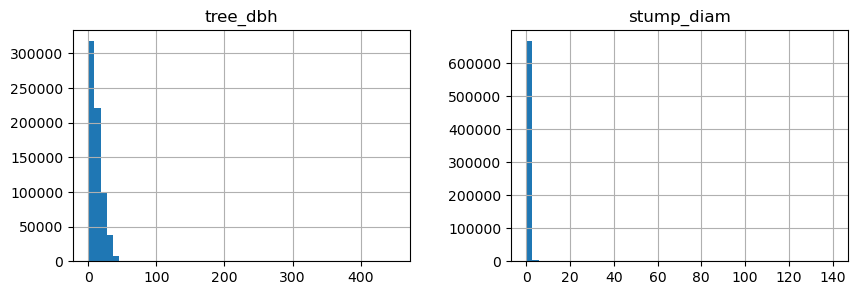

In [4]:
df[['tree_dbh', 'stump_diam']].hist(bins=50, figsize=(10, 3))

Number of Trees in each Borough

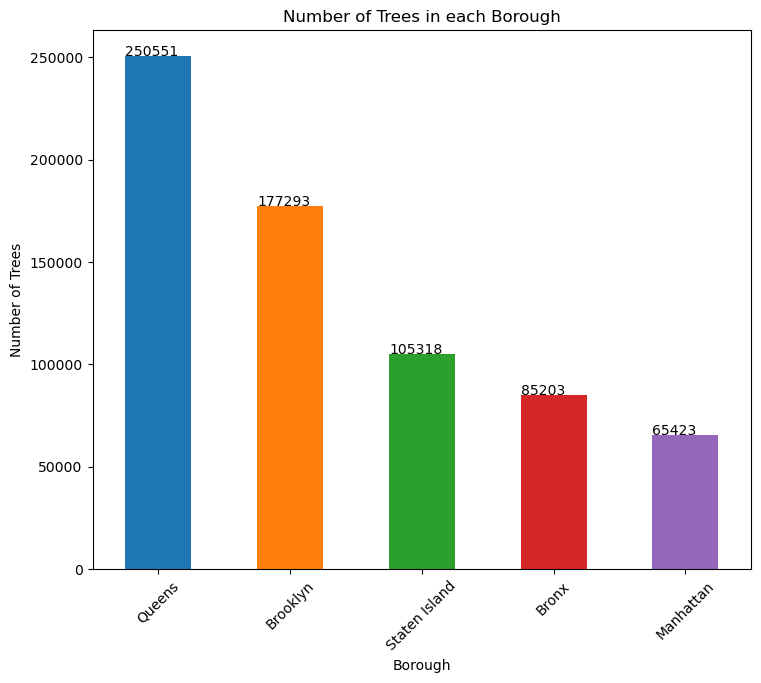

In [5]:
borough = df['borough'].value_counts()
ax = borough.plot(
    kind='bar',
    title="Number of Trees in each Borough",
    figsize=(8.5, 7),
    color=plt.cm.tab10.colors,
)
ax.set_xlabel("Borough")
ax.set_ylabel("Number of Trees")
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x(), p.get_height()))

Number of Trees in each Borough per Square Mile

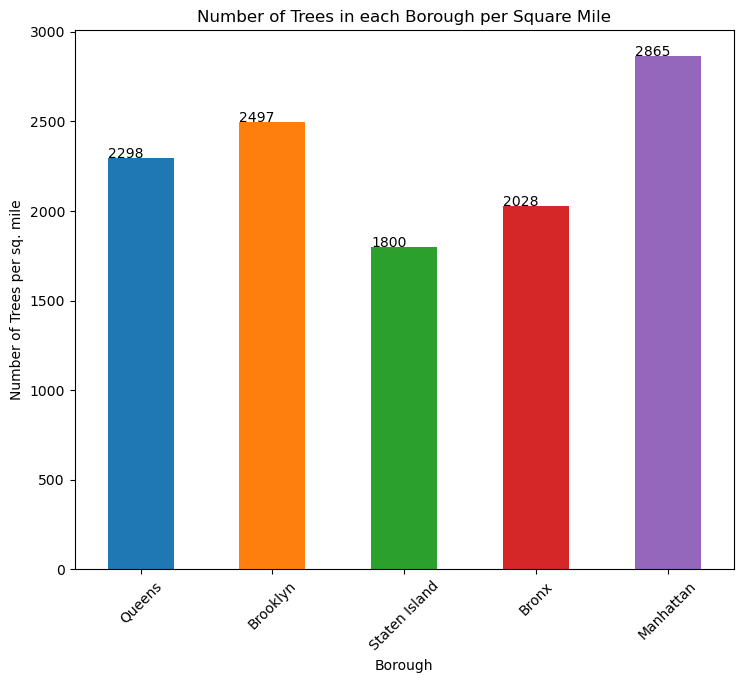

In [6]:
borough['Queens'] = borough['Queens'] / 109
borough['Brooklyn'] = borough['Brooklyn'] / 71
borough['Staten Island'] = borough['Staten Island'] / 58.5
borough['Manhattan'] = borough['Manhattan'] / 22.83
borough['Bronx'] = borough['Bronx'] / 42
ax = borough.plot(
    kind='bar',
    title="Number of Trees in each Borough per Square Mile",
    figsize=(8.5, 7),
    color=plt.cm.tab10.colors,
)
ax.set_xlabel("Borough")
ax.set_ylabel("Number of Trees per sq. mile")
ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x(), p.get_height()))

### Missing values

In [7]:
print('Number of row in each column:', len(df))

Number of row in each column: 683788


In [8]:
missing_values = df.isna().sum()
missing_index = missing_values[missing_values > 0].index
pd.DataFrame(
    {
        'Number of missing values': missing_values[missing_index],
        '% of missing values': missing_values[missing_index] / len(df) * 100,
    }
)

Number of missing values  % of missing values
health                               31616             4.623655
spc_latin                            31619             4.624094
spc_common                           31619             4.624094
steward                             519438            75.964773
guards                              603922            88.320064
sidewalk                             31616             4.623655
problems                            457944            66.971634
council district                      6519             0.953366
census tract                          6519             0.953366
bin                                   9559             1.397948
bbl                                   9559             1.397948

Pie-charts of missing values in 4 features ('health', 'spc_common', 'steward', 'problems')

array([<Axes: ylabel='spc_common missing values, %'>,
       <Axes: ylabel='steward missing values, %'>], dtype=object)

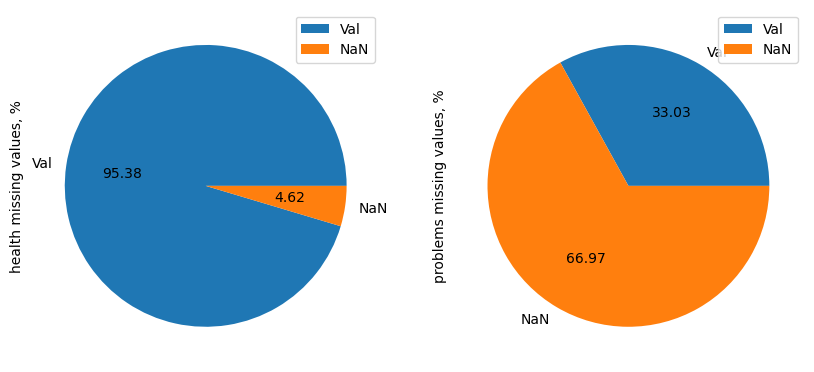

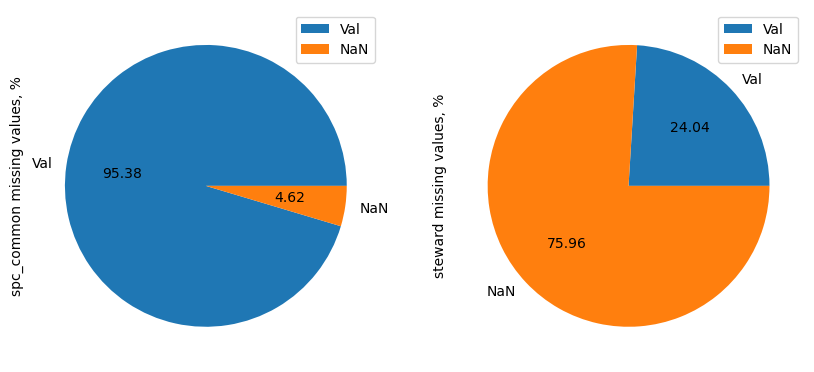

In [9]:
health_missing = df['health'].isna().value_counts()
health_missing.index = health_missing.index.map({False: 'Val', True: 'NaN'})
health_missing.name = 'health missing values, %'
# health_missing.plot.pie(autopct="%.2f")

spc_common_missing = df['spc_common'].isna().value_counts()
spc_common_missing.index = spc_common_missing.index.map(
    {False: 'Val', True: 'NaN'}
)
spc_common_missing.name = 'spc_common missing values, %'
# spc_common_missing.plot.pie(autopct="%.2f")

steward_missing = df['steward'].isna().value_counts()
steward_missing.index = steward_missing.index.map({False: 'Val', True: 'NaN'})
steward_missing.name = 'steward missing values, %'
# steward_missing.plot.pie(autopct="%.2f")

problems_missing = df['problems'].isna().value_counts()
problems_missing.index = problems_missing.index.map(
    {False: 'Val', True: 'NaN'}
)
problems_missing.name = 'problems missing values, %'
# problems_missing.plot.pie(autopct="%.2f")

missing = pd.DataFrame([health_missing, problems_missing]).transpose()
missing.plot.pie(subplots=True, figsize=(10, 5), autopct="%.2f")

missing = pd.DataFrame([spc_common_missing, steward_missing]).transpose()
missing.plot.pie(subplots=True, figsize=(10, 5), autopct="%.2f")

### Pairwise distribution

Select random 10% of rows and take several colomns

In [10]:
select_columns = [
    'tree_id',
    'created_at',
    'tree_dbh',
    'stump_diam',
    'status',
    'health',
    'spc_common',
    'borocode',
    'borough',
    'latitude',
    'longitude',
]
df_sub = df[select_columns].select_dtypes('number').sample(frac=0.1)
df_sub.shape

(68379, 6)

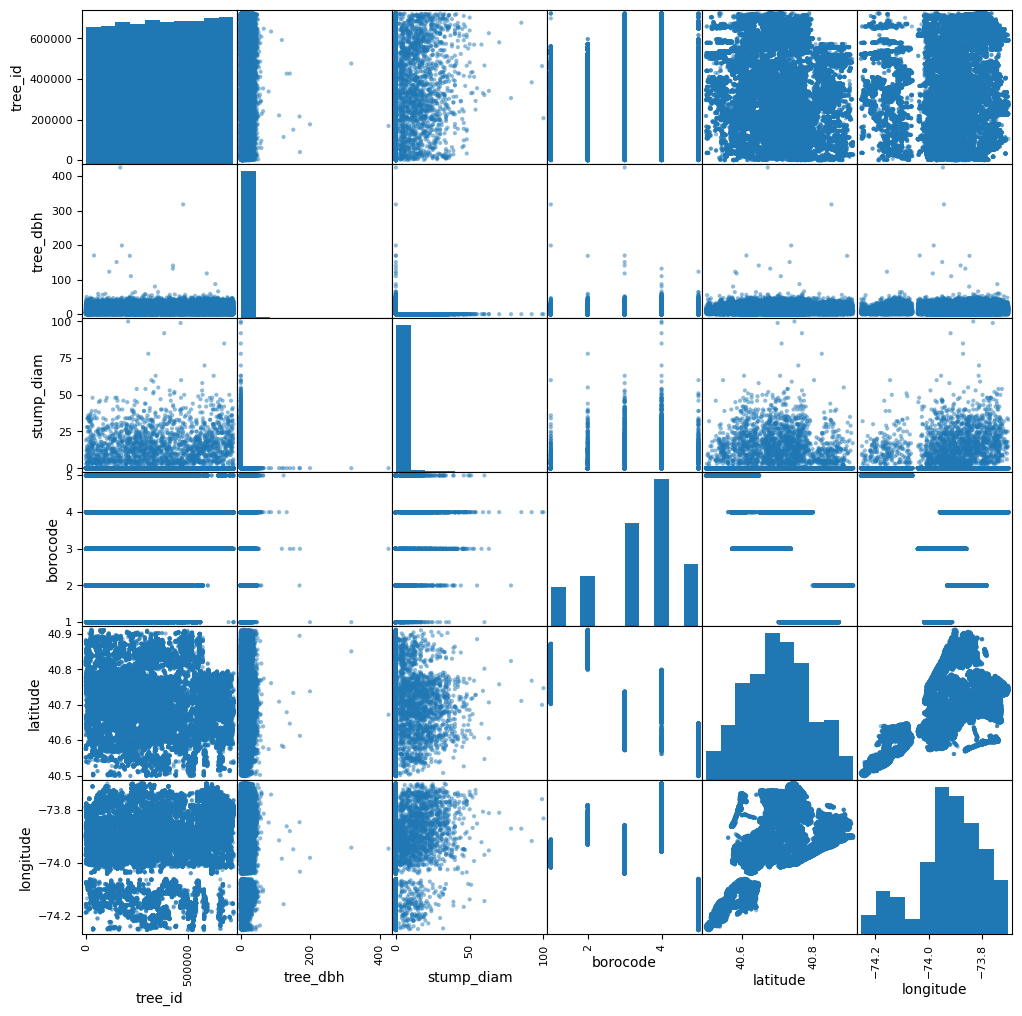

In [11]:
grr = pd.plotting.scatter_matrix(df_sub, figsize=(12, 12))

### Correlation matrix

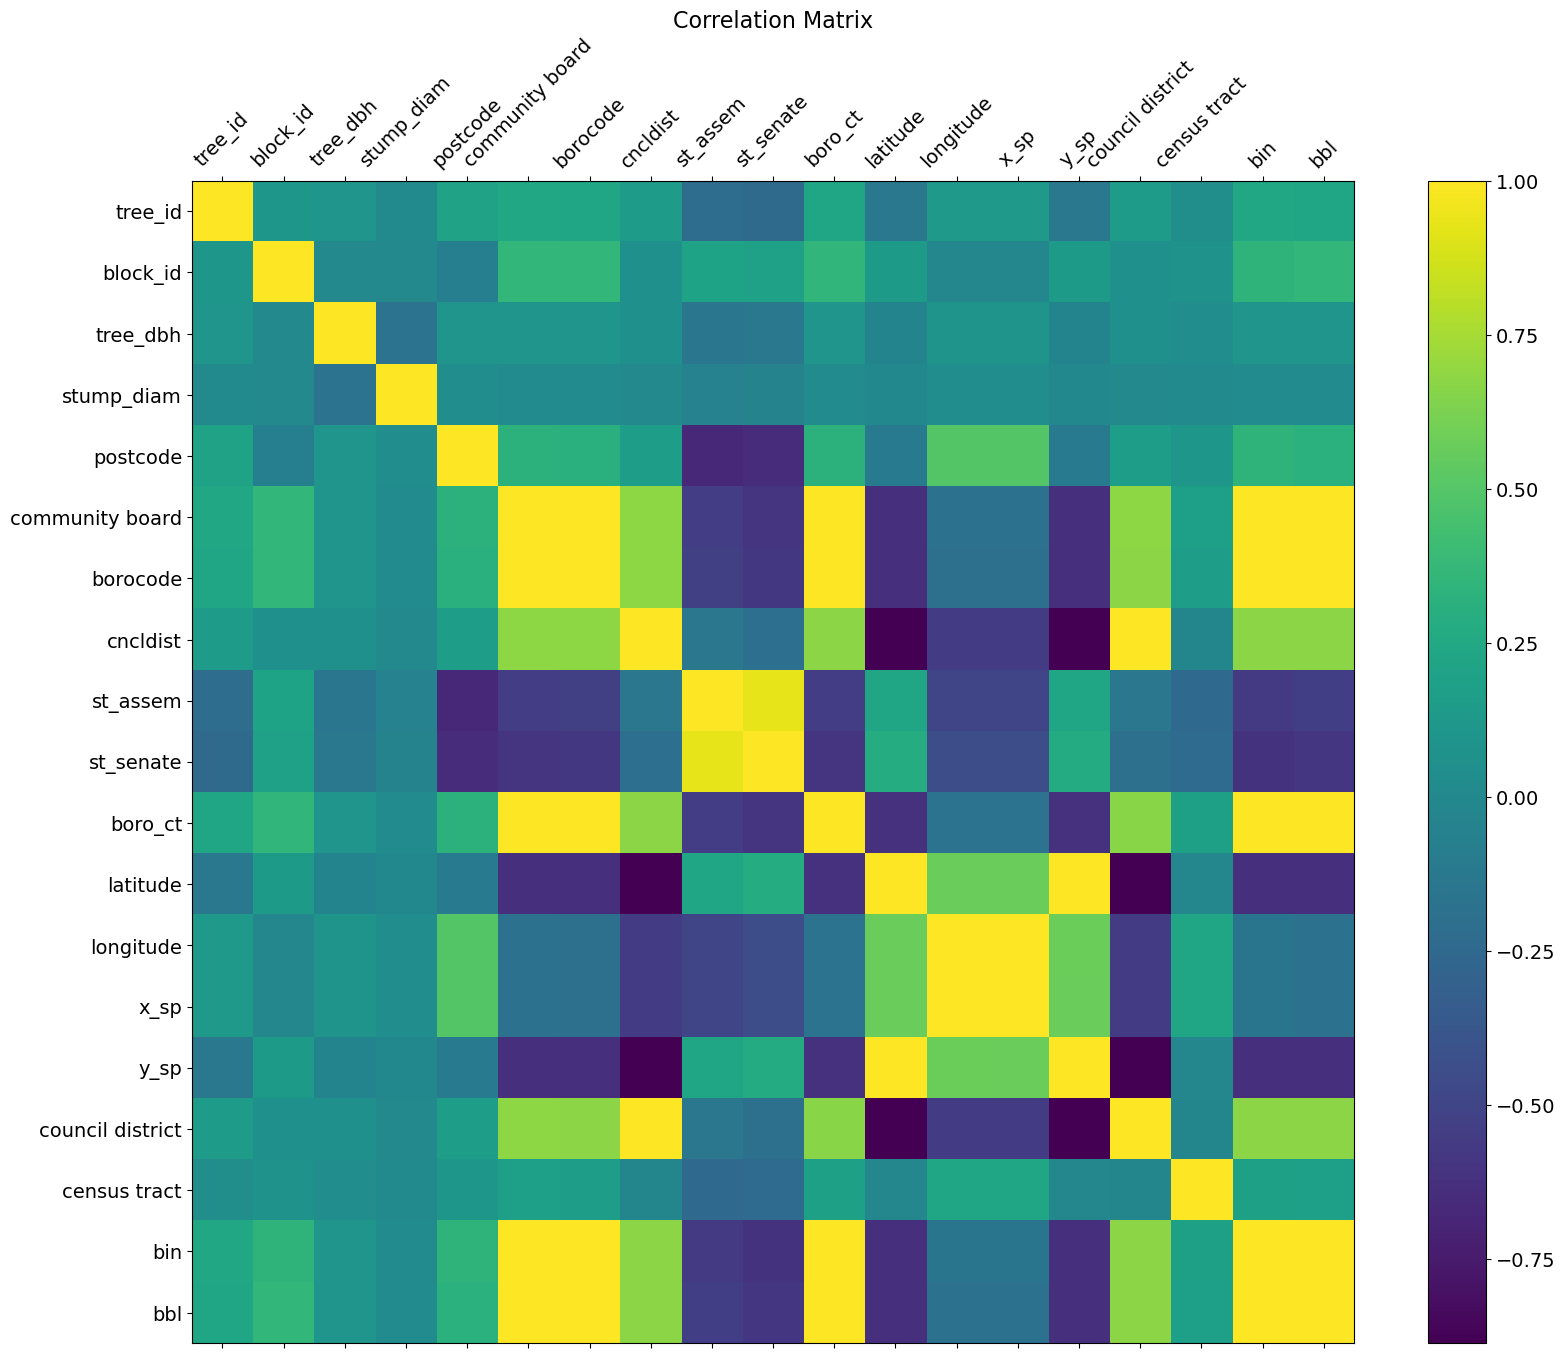

In [12]:
f = plt.figure(figsize=(19, 15))
plt.matshow(df.select_dtypes(['number']).corr(), fignum=f.number)
plt.xticks(
    range(df.select_dtypes(['number']).shape[1]),
    df.select_dtypes(['number']).columns,
    fontsize=14,
    rotation=45,
)
plt.yticks(
    range(df.select_dtypes(['number']).shape[1]),
    df.select_dtypes(['number']).columns,
    fontsize=14,
)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

### Tree map

Select top big trees and simplify name of their species

In [13]:
big_tree = df[select_columns][df['tree_dbh'] > 50]
species = big_tree['spc_common'].apply(lambda x: str(x).split()[-1])
species.name = 'species'
top_10_species = species.value_counts()[:10].index
big_tree['species'] = species
top_big_tree = big_tree[big_tree.species.isin(top_10_species)]
print("Number of selected trees:", len(top_big_tree))
print("From species:", top_10_species)

Number of selected trees: 323
From species: Index(['oak', 'planetree', 'maple', 'pear', 'linden', 'elm', 'honeylocust',
       'cherry', 'mulberry', 'zelkova'],
      dtype='object', name='species')


Create GeoPandas DataFrame

In [14]:
geometry = gpd.points_from_xy(top_big_tree.longitude, top_big_tree.latitude)
geo_df = gpd.GeoDataFrame(top_big_tree, geometry=geometry)
geo_df.head()

tree_id               created_at  tree_dbh  stump_diam status health  \
2405    168583  2015-08-23T00:00:00.000       425           0  Alive   Good   
3738    199546  2015-09-03T00:00:00.000        51           0  Alive   Good   
4887    139665  2015-08-12T00:00:00.000        72           0  Alive   Good   
6724    209349  2015-09-08T00:00:00.000       122           0  Alive   Good   
10083   215075  2015-09-11T00:00:00.000       169           0  Alive   Good   

            spc_common  borocode        borough   latitude  longitude  \
2405   swamp white oak         3       Brooklyn  40.672287 -73.946936   
3738      silver maple         4         Queens  40.789872 -73.803291   
4887      silver maple         5  Staten Island  40.572363 -74.091712   
6724           pin oak         5  Staten Island  40.562379 -74.115959   
10083      honeylocust         2          Bronx  40.894886 -73.847206   

           species                    geometry  
2405           oak  POINT (-73.94694 40.67229)  
3738         maple  POINT (-73.80329 40.78987)  
4887         maple  POINT (-74.09171 40.57236)  
6724           oak  POINT (-74.11596 40.56238)  
10083  honeylocust  POINT (-73.84721 40.89489)

Load map of New York Boroughs

In [15]:
nybb = gpd.read_file(geodatasets.get_path('nybb'))
nybb.crs

<Projected CRS: EPSG:2263>
Name: NAD83 / New York Long Island (ftUS)
Axis Info [cartesian]:
- X[east]: Easting (US survey foot)
- Y[north]: Northing (US survey foot)
Area of Use:
- name: United States (USA) - New York - counties of Bronx; Kings; Nassau; New York; Queens; Richmond; Suffolk.
- bounds: (-74.26, 40.47, -71.8, 41.3)
Coordinate Operation:
- name: SPCS83 New York Long Island zone (US Survey feet)
- method: Lambert Conic Conformal (2SP)
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

Change map geometry and draw trees on it

In [16]:
nybb = nybb.set_geometry("geometry")
boroughs_4326 = nybb.to_crs("EPSG:4326")

Text(0.5, 1.0, 'Tree')

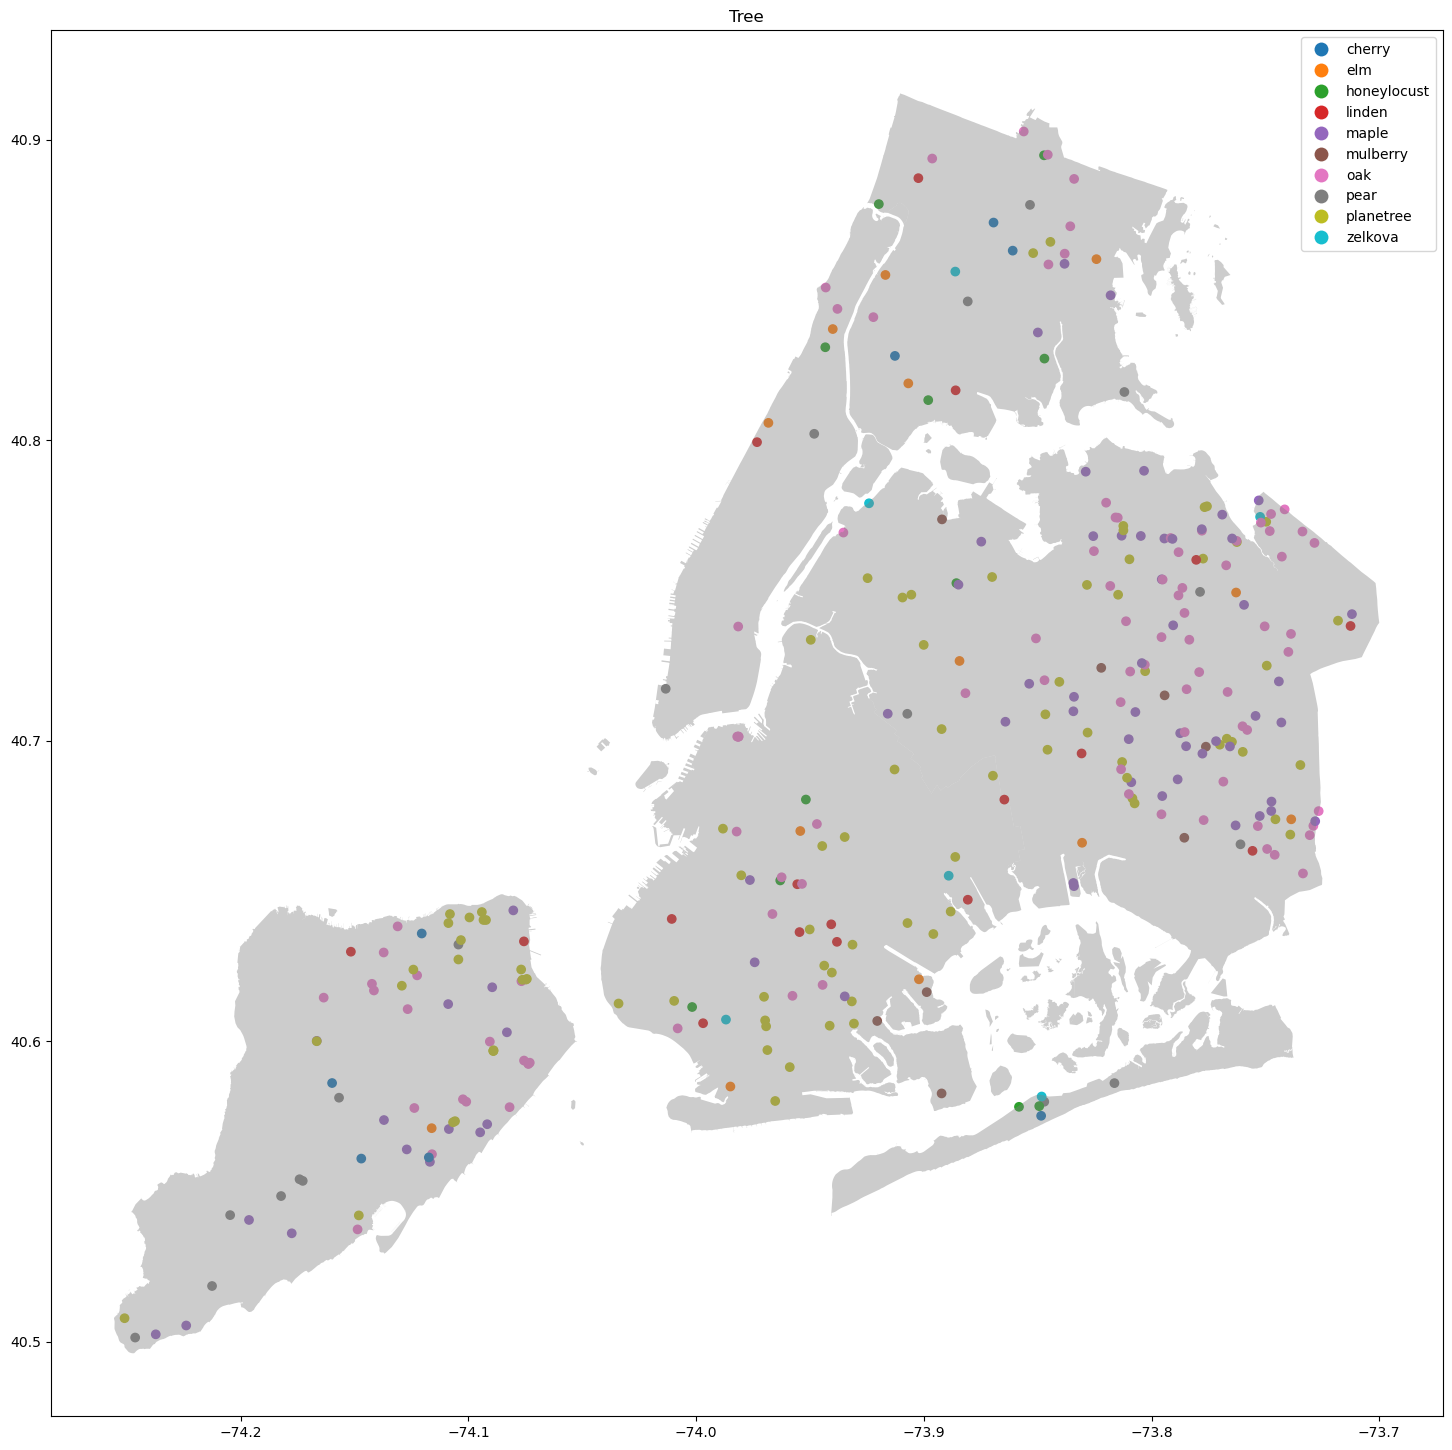

In [17]:
fig, ax = plt.subplots(figsize=(24, 18))
geo_df.plot(column="species", ax=ax, legend=True, cmap='tab10')
boroughs_4326.plot(ax=ax, alpha=0.4, color="grey")
plt.title("Tree")

Drawing all trees from dataset takes too long time. 
There is [public notebook](https://www.kaggle.com/code/paultimothymooney/exploring-the-2015-nyc-tree-census-data-python?scriptVersionId=4331587&cellId=4) with such map.

In [18]:
# df2 = pd.read_csv(zip_file.open("2015-street-tree-census-tree-data.csv"), usecols=['latitude', 'longitude'])
# latitudes = df2.latitude.tolist()
# longitudes = df2.longitude.tolist()
# xmin, xmax = min(latitudes), max(latitudes)
# ymin, ymax = min(longitudes), max(longitudes)
# X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
# positions = np.vstack([X.ravel(), Y.ravel()])
# values = np.vstack([latitudes, longitudes])
# kernel = stats.gaussian_kde(values)
# Z = np.reshape(kernel(positions).T, X.shape)
# fig = plt.figure()
# fig.set_size_inches(30, fig.get_figwidth(), forward=True)
# ax = fig.add_subplot(111)
# ax.imshow(np.rot90(Z), cmap=plt.cm.Greens,extent=[xmin, xmax, ymin, ymax])
# ax.plot(latitudes, longitudes, 'k.', markersize=0.02)
# ax.set_xlabel("Latitude")
# ax.set_ylabel("Longitude")
# ax.set_xlim([xmin, xmax])
# ax.set_ylim([ymin, ymax])
# ax.set_title("Map of Tree Data")
# plt.show()

### Conclusion

Some columns have quite a lot of missing data, but this is not so important for the study. Where there are few missing values, they can be replaced. Or rows containing missing values can be removed. 

It is also worth paying attention to the presence of outliers. They were not studied in this research. 

In general, there is a lot of data and in order to speed up calculations in the process of the study, can take a small sample and work with it.